In [119]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import import_ipynb
import TP_WeatherAUS as TP
import importlib
importlib.reload(TP)
# Se ignoran los "FutureWarnings" molestos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [120]:
# Read cvs file and generate copy
DATASET_PATH = 'weatherAUS.csv'
dataset = pd.read_csv(DATASET_PATH)
dataset_=dataset.copy()

In [121]:
TP.date2columns(dataset_)
    

,Year,MonthDay,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12.03125,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008,12.06250,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008,12.09375,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008,12.12500,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008,12.15625,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017,6.65625,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017,6.68750,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017,6.71875,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017,6.75000,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [122]:
dataset_.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [123]:
dataset_.describe()
# Se descartan los años 2007 y 2008 por incompletud.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [124]:
dataset_.skew()

MinTemp          0.021188
MaxTemp          0.220839
Rainfall         9.836225
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874879
WindSpeed9am     0.777630
WindSpeed3pm     0.628215
Humidity9am     -0.483969
Humidity3pm      0.033614
Pressure9am     -0.095524
Pressure3pm     -0.045621
Cloud9am        -0.229082
Cloud3pm        -0.226384
Temp9am          0.088540
Temp3pm          0.237960
dtype: float64

In [125]:
dataset_.kurt(numeric_only=True)

MinTemp           -0.483972
MaxTemp           -0.224630
Rainfall         178.152079
Evaporation       45.043266
Sunshine          -0.829459
WindGustSpeed      1.418642
WindSpeed9am       1.226991
WindSpeed3pm       0.763858
Humidity9am       -0.037555
Humidity3pm       -0.511363
Pressure9am        0.231563
Pressure3pm        0.129172
Cloud9am          -1.538830
Cloud3pm          -1.456525
Temp9am           -0.340523
Temp3pm           -0.136281
dtype: float64

In [126]:
dataset_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [127]:
#pd.value_counts(dataset_["Evaporation"]) #continua
#pd.value_counts(dataset_["Sunshine"]) #continua Ojo! Tiene 2356 valores == 0, tiene sentido los valores que tiene? entre 10 y 14
#pd.value_counts(dataset_["WindGustDir"]) # Categorica, 16 valores bien distribuidos(toma en cuenta NNW, etc...)
#pd.value_counts(dataset_["WindSpeed9am"]) # Numerica discreta? Por los valores, parece que en este caso se tomaron medidas sin flotante.
#pd.value_counts(dataset_["Humidity9am"]) # Idem
#pd.value_counts(dataset_["Pressure9am"]) # Numerica continua
#pd.value_counts(dataset_["Cloud9am"]) # Discreta Categorica-Numerica? 
#pd.value_counts(dataset_["Temp9am"]) #Continua


In [128]:
dataset_=TP.date2columns(dataset_)

In [129]:
# se queda con los años 15,16 y 17 por completitud y suficiencia para el analisis.
dataset_filt=dataset_[dataset_["Year"]>=2014]

In [130]:
TP.geoloc(dataset_filt);   #.loc[row_indexer,col_indexer] = value

El dataset tiene 49 localidades distintas
(-11, 13) Albury
(-8, 17) BadgerysCreek
(-6, 12) Cobar
(-5, 20) CoffsHarbour
(-4, 16) Moree
(-7, 18) Newcastle
(-8, 18) NorahHead
(-4, 34) NorfolkIsland
(-8, 17) Penrith
(-12, 12) Richmond
(-8, 18) Sydney
(-8, 18) SydneyAirport
(-10, 14) WaggaWagga
(-7, 18) Williamtown
(-9, 17) Wollongong
(-10, 16) Canberra
(-10, 16) Tuggeranong
(-10, 15) MountGinini
(-12, 10) Ballarat
(-11, 11) Bendigo
(-13, 14) Sale
(-12, 11) MelbourneAirport
(-12, 11) Melbourne
(-9, 9) Mildura
(-10, 8) Nhil
(-13, 8) Portland
(-12, 12) Watsonia
(-12, 8) Dartmoor
(-2, 20) Brisbane
(8, 12) Cairns
(-3, 20) GoldCoast
(5, 13) Townsville
(-9, 5) Adelaide
(-12, 7) MountGambier
(-9, 5) Nuriootpa
(-6, 3) Woomera
(-10, -15) Albany
(-9, -17) Witchcliffe
(-6, -16) PearceRAAF
(-6, -17) PerthAirport
(-6, -17) Perth
(-7, -11) SalmonGums
(-9, -16) Walpole
(-17, 14) Hobart
(-16, 14) Launceston
(1, 0) AliceSprings
(12, -2) Darwin
(10, 0) Katherine
(0, -1) Uluru


In [131]:
dataset_filt.head()

,Year,MonthDay,Latitude,Longitude,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1768,2014,1.03125,-11.0,13.0,Albury,12.0,27.4,0.0,NaN,NaN,...,56.0,38.0,1011.1,1008.6,NaN,1.0,20.3,25.9,No,No
1769,2014,1.06250,-11.0,13.0,Albury,16.7,27.7,0.0,NaN,NaN,...,61.0,22.0,1006.1,1005.8,1.0,1.0,22.3,26.4,No,No
1770,2014,1.09375,-11.0,13.0,Albury,18.9,30.6,0.2,NaN,NaN,...,40.0,32.0,1003.1,999.1,8.0,8.0,22.3,27.5,No,No
1771,2014,1.12500,-11.0,13.0,Albury,13.1,25.6,0.0,NaN,NaN,...,46.0,28.0,1006.8,1005.7,NaN,4.0,16.8,24.2,No,No
1772,2014,1.15625,-11.0,13.0,Albury,8.4,29.4,0.0,NaN,NaN,...,50.0,24.0,1009.4,1004.5,NaN,1.0,18.7,28.9,No,No


In [132]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(dataset_filt.drop(columns={'RainTomorrow'}), dataset_filt["RainTomorrow"], test_size=0.33, shuffle=True,random_state=42)

In [133]:
y_train_=pd.DataFrame(y_train_).rename(columns={0:"RainTomorrow"}).reset_index()
X_train_=pd.DataFrame(X_train_).reset_index()

In [134]:
#completo RainTomorrow con lo RainToday
aux3_=[]
k=0
j=0
for i in range(0,len(y_train_["RainTomorrow"])):

    try:
        if  pd.isna(y_train_["RainTomorrow"][i]) and pd.notna(X_train_["RainToday"][i+1]):
            k=k+1
            aux3_.append(X_train_["RainToday"][i+1])
        else:
            aux3_.append(y_train_["RainTomorrow"][i])
           
    except:
        aux3_.append(y_train_["RainTomorrow"][i])
        j=j+1
        print("exceptuados",j)

    
print("La cantidad de valores que pueden ser completados en RainTomorrow",k)
print(pd.DataFrame(aux3_).value_counts())
aux3__=pd.DataFrame(aux3_)

La cantidad de valores que pueden ser completados en RainTomorrow 1111
No     32662
Yes     9068
dtype: int64


In [135]:
y_train__=aux3__
y_train__.isna().sum()

0    29
dtype: int64

In [136]:
print("\n \n nans antes \n \n",pd.DataFrame(y_train_["RainTomorrow"]).isna().value_counts()/len(y_train_["RainTomorrow"]),
"\n \n nans despues \n \n",aux3__.isna().value_counts()/len(aux3__))


 
 nans antes 
 
 RainTomorrow
False           0.9727
True            0.0273
dtype: float64 
 
 nans despues 
 
 False    0.999306
True     0.000694
dtype: float64


In [137]:
print("\n \n nans antes \n \n",pd.DataFrame(X_train_["WindGustDir"]).isna().value_counts()/len(X_train_["WindGustDir"]))



 
 nans antes 
 
 WindGustDir
False          0.93939
True           0.06061
dtype: float64


In [138]:
k=0
print(X_train_["WindGustDir"].isna().sum())
for i in range(0,len(X_train_["WindDir9am"])):

    if pd.isna(X_train_["WindGustDir"][i]) and X_train_["WindDir9am"][i]==X_train_["WindDir3pm"][i]:
        k=k+1
        #print( X_train_["WindGustDir"][i])
        X_train_["WindGustDir"][i]=X_train_["WindDir9am"][i]
        #print( X_train_["WindGustDir"][i])
        

print("Bajo criterio eligido, pueden ser reemplazados {} valores".format(k))
print("\n \n nans despues \n \n",pd.DataFrame(X_train_["WindGustDir"]).isna().value_counts()/len(X_train_["WindGustDir"]))

2531
Bajo criterio eligido, pueden ser reemplazados 236 valores

 
 nans despues 
 
 WindGustDir
False          0.945042
True           0.054958
dtype: float64


In [139]:
# se aplica mice a todas las columnas a imputar
#direccion y velocidad de viento

print(X_train_["WindGustDir"].isna().sum())
X_train_["WindGustDir"].fillna(method="ffill", inplace=True) # metodo de propagacion hacia adelante
print(X_train_["WindGustDir"].isna().sum())

2295
0


In [140]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
aux_=[]
enc = preprocessing.LabelEncoder()

y_train=pd.DataFrame(enc.fit_transform(np.ravel(y_train_["RainTomorrow"])))
X_train_["RainToday_enc"]=enc.fit_transform(np.ravel(X_train_["RainToday"]))
X_train_["WindGustDir_enc"]=enc.fit_transform(np.ravel(X_train_["WindGustDir"]))
X_train_["WindDir9am_enc"]=enc.fit_transform(np.ravel(X_train_["WindDir9am"]))
X_train_["WindDir3pm_enc"]=enc.fit_transform(np.ravel(X_train_["WindDir3pm"]))
X_train_["Location_enc"]=enc.fit_transform(np.ravel(X_train_["Location"]))

# Creamos las coordenadas polares para la dirección del viento
X_train_.loc[:,'WindDir_polar1'] = np.cos(2*np.pi * X_train_['WindGustDir_enc'] / 16)
X_train_.loc[:,'WindDir_polar2'] = np.sin(2*np.pi * X_train_['WindGustDir_enc'] / 16)

X_train=X_train_.drop(columns={'WindGustDir_enc',"RainToday","WindGustDir","WindDir9am","WindDir3pm","Location"})

In [141]:
# se aplica mice a todas las columnas a imputar
#'MaxTemp'
pd.set_option('mode.chained_assignment', None) # a solucionar
warnings.simplefilter(action='ignore', category=FutureWarning) 
col_to_impute = 'MaxTemp'
feature_cols = ['MinTemp', 'Temp9am', 'Temp3pm']
datasetIMP = TP.impute_column(X_train, col_to_impute, feature_cols)
#'Humidity'
col_to_impute=[]
feature_cols = []
col_to_impute = 'Humidity9am'
feature_cols = ['Humidity3pm',"Cloud9am","Evaporation"]
datasetIMP1 = TP.impute_column(datasetIMP, col_to_impute, feature_cols)
#'Rainfall'
col_to_impute=[]
feature_cols = []
col_to_impute = 'Rainfall'
feature_cols = ["Cloud9am","Cloud3pm"]
datasetIMP2 = TP.impute_column(datasetIMP1, col_to_impute, feature_cols)
#direccion y velocidad de viento
col_to_impute=[]
feature_cols = []
col_to_impute = 'WindGustSpeed'
feature_cols = ['WindSpeed9am',"WindSpeed3pm"]
datasetIMP3 = TP.impute_column(datasetIMP2, col_to_impute, feature_cols)
#Pressure9am
col_to_impute=[]
feature_cols = []
col_to_impute = 'Pressure9am'
feature_cols = ['Pressure3pm','Sunshine']
datasetIMP4 = TP.impute_column(datasetIMP3, col_to_impute, feature_cols)

41230
529
40943
816
40632
1127
39245
2514
36874
4885


C:\Users\54922\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\54922\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\54922\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\54922\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\54922\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearReg

In [142]:
X_train_num=X_train.drop(columns={"RainToday_enc","Location_enc","WindDir_polar1","WindDir_polar2","WindDir9am_enc","WindDir3pm_enc"})
X_train_imp_num=datasetIMP4.drop(columns={"RainToday_enc","Location_enc","WindDir_polar1","WindDir_polar2","WindDir9am_enc","WindDir3pm_enc"})
X_train_cat=pd.DataFrame(X_train, columns = ["RainToday_enc","Location_enc","WindDir_polar1","WindDir_polar2","WindDir9am_enc","WindDir3pm_enc"])
X_train_imp_cat=pd.DataFrame(datasetIMP4, columns = ["RainToday_enc","Location_enc","WindDir_polar1","WindDir_polar2","WindDir9am_enc","WindDir3pm_enc"])
X_train_imp_num=X_train_imp_num.drop(columns={"index"})
X_train_num=X_train_num.drop(columns={"index"})

In [143]:
# Visualizamos la distribución de cada columna
def display_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10), color='blue', bins=20)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

In [144]:
X_train_num_drop=X_train_num.drop(columns={"Year","MonthDay","Temp9am","Temp3pm","MinTemp",
"Evaporation","Sunshine","WindSpeed9am","WindSpeed3pm","Cloud9am","Cloud3pm","Pressure3pm","Humidity3pm","Latitude","Longitude"})

In [145]:
X_train_imp_num_drop=X_train_imp_num.drop(columns={"Latitude","Longitude","Year","MonthDay","Temp9am","Temp3pm","MinTemp",
"Evaporation","Sunshine","WindSpeed9am","WindSpeed3pm","Cloud9am","Cloud3pm","Pressure3pm","Humidity3pm"})

In [146]:
X_train_num_drop.describe()

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Pressure9am
count,41230.000000,40632.000000,39245.000000,40943.000000,36874.000000
mean,23.771889,2.181633,39.645968,69.020345,1017.935545
std,7.312801,7.965472,13.407973,19.238855,7.118062
min,-4.800000,0.000000,7.000000,2.000000,982.000000
25%,18.300000,0.000000,31.000000,57.000000,1013.200000
50%,23.300000,0.000000,37.000000,70.000000,1017.900000
75%,29.000000,0.600000,46.000000,83.000000,1022.600000
max,47.300000,247.200000,130.000000,100.000000,1040.300000


In [147]:
X_train_imp_num_drop.describe()

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Pressure9am
count,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000
mean,23.770852,2.188393,39.535125,69.040367,1017.933847
std,7.270795,7.858487,13.215030,19.072867,6.690728
min,-4.800000,-0.343438,7.000000,2.000000,982.000000
25%,18.400000,0.000000,31.000000,57.000000,1013.900000
50%,23.400000,0.000000,37.050684,70.000000,1017.933847
75%,28.900000,1.000000,46.000000,83.000000,1021.900000
max,47.300000,247.200000,130.000000,103.806815,1040.300000


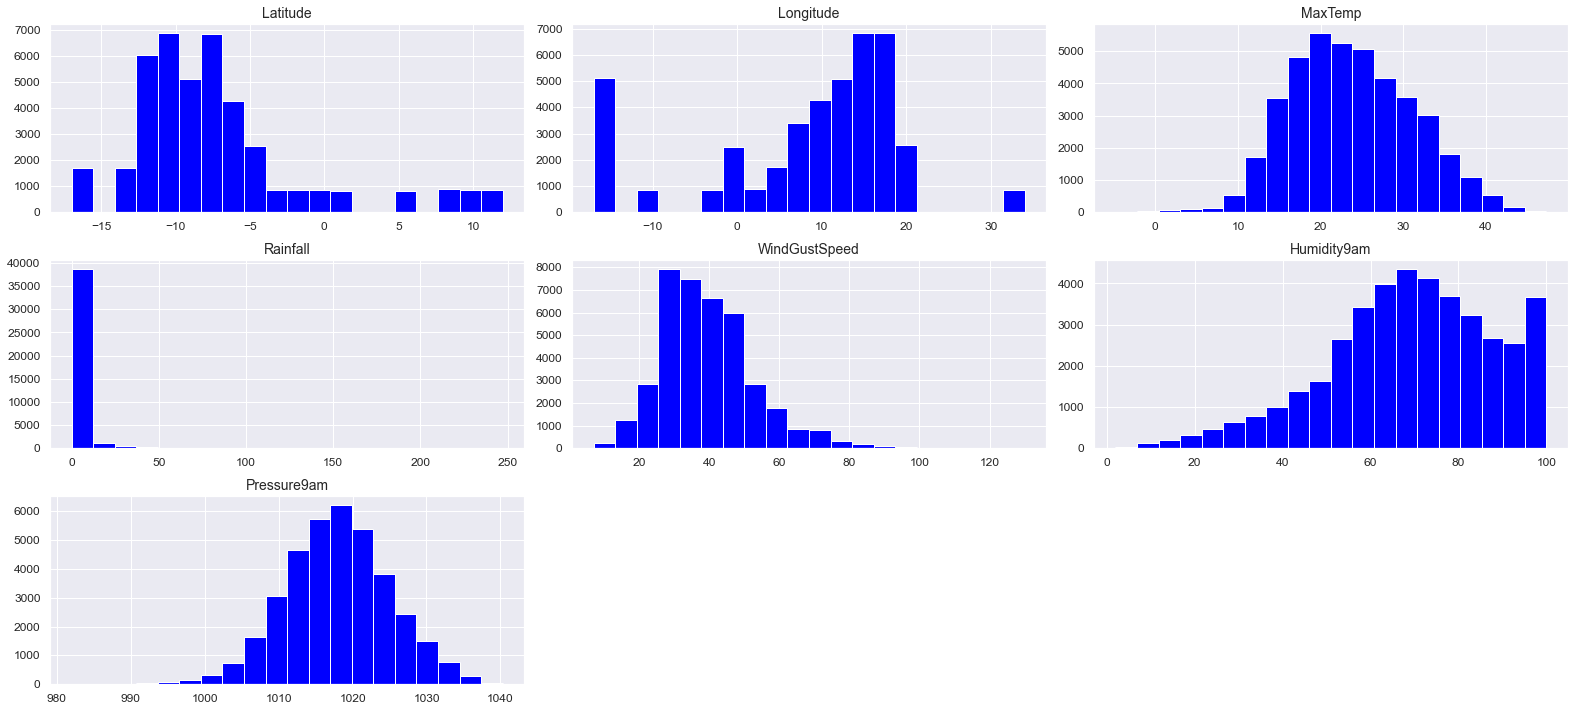

In [148]:
display_distributions(X_train_num.drop(columns={"Year","MonthDay","Temp9am","Temp3pm","MinTemp",
"Evaporation","Sunshine","WindSpeed9am","WindSpeed3pm","Cloud9am","Cloud3pm","Pressure3pm","Humidity3pm"}))

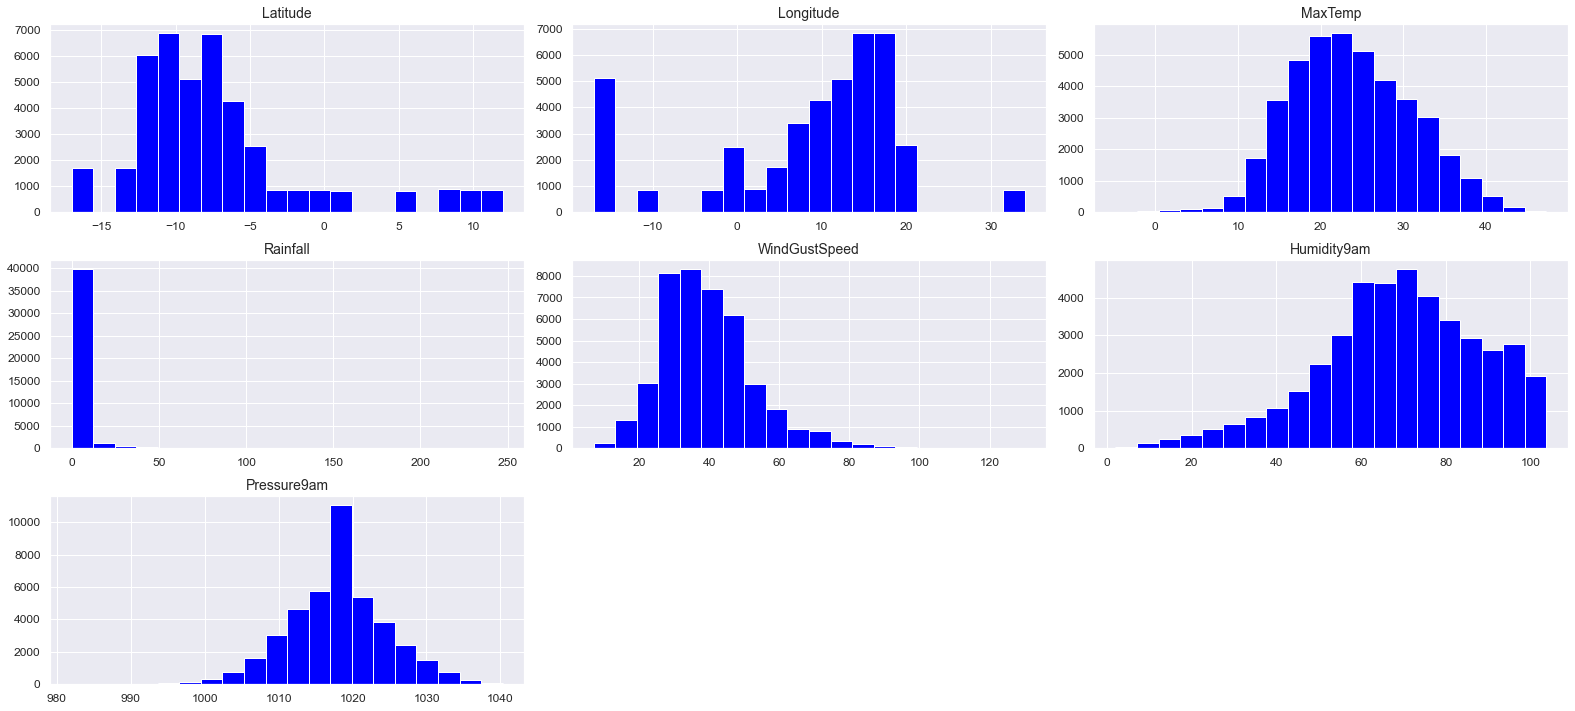

In [149]:
display_distributions(X_train_imp_num.drop(columns={"Year","MonthDay","Temp9am","Temp3pm","MinTemp",
"Evaporation","Sunshine","WindSpeed9am","WindSpeed3pm","Cloud9am","Cloud3pm","Pressure3pm","Humidity3pm"}))

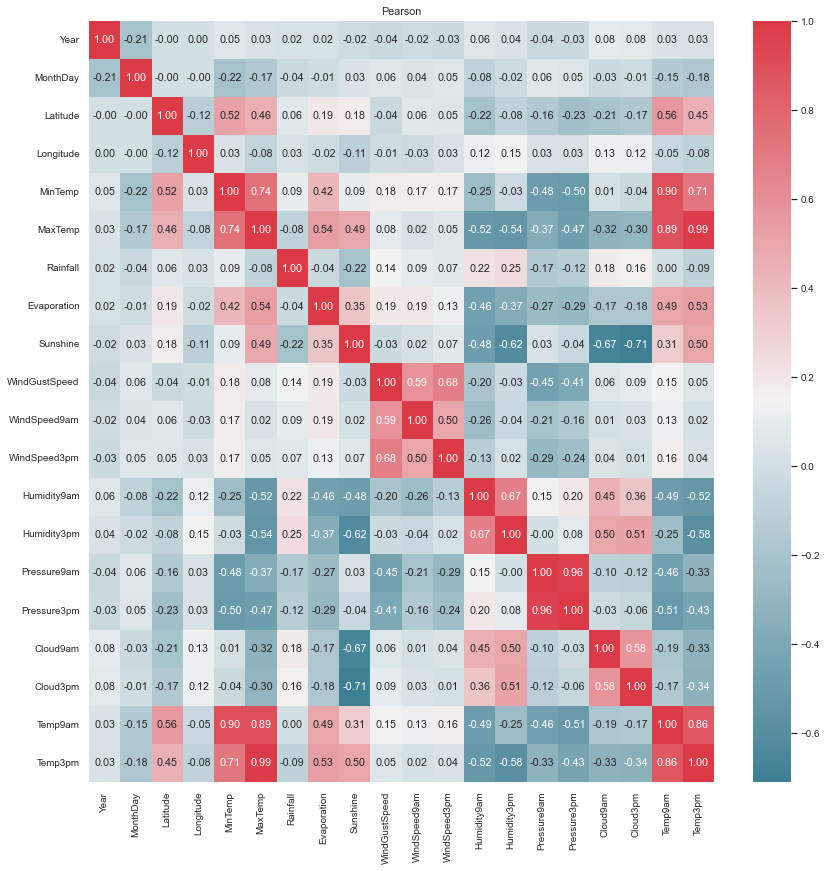

In [150]:
fig, axes = plt.subplots(1,1,figsize=(14,14))

r = X_train_num.corr(method='pearson')
axes.set_title("Pearson")
sns.heatmap(r, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f",ax=axes)
sns.set(font_scale=0.9)

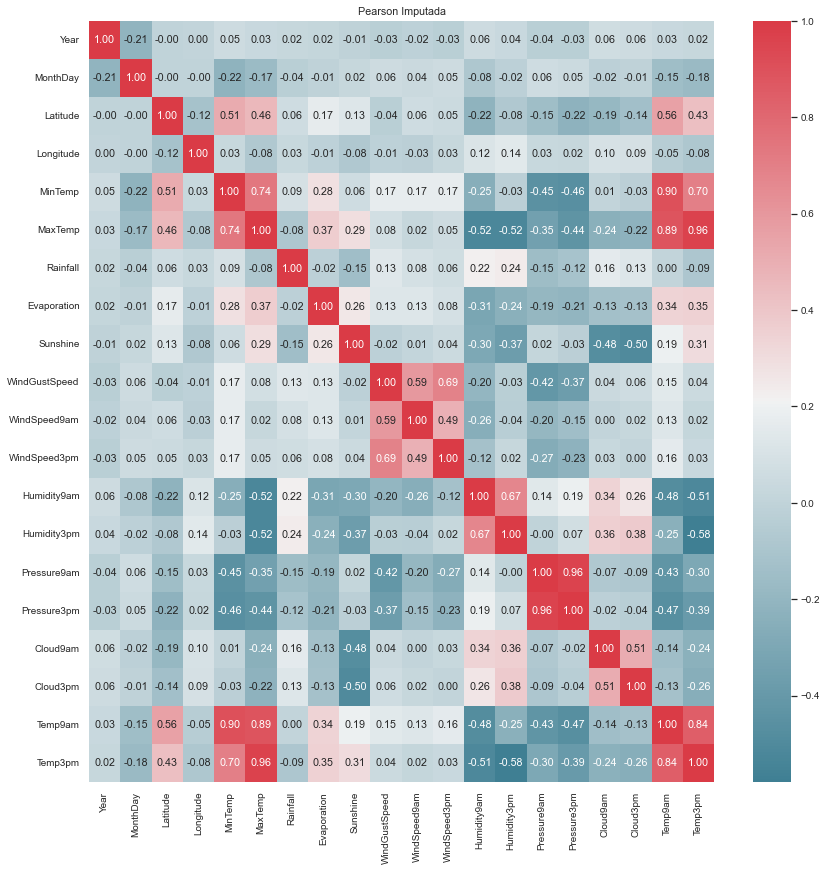

In [151]:
fig, axes = plt.subplots(1,1,figsize=(14,14))

r = X_train_imp_num.corr(method='pearson')
axes.set_title("Pearson Imputada")
sns.heatmap(r, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f",ax=axes)
sns.set(font_scale=0.9)

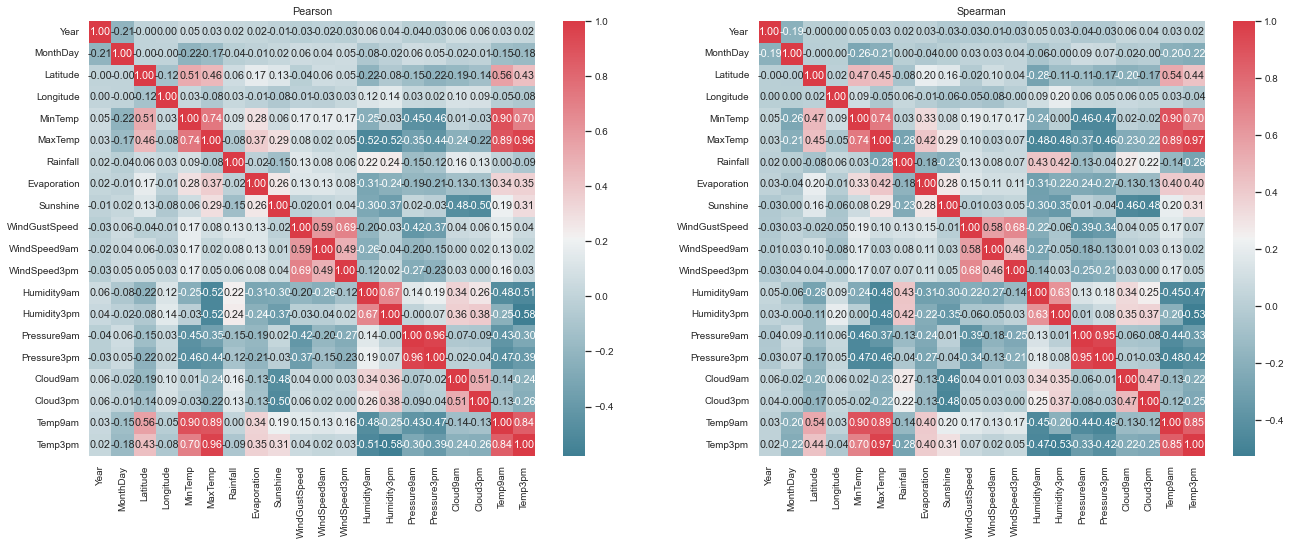

In [152]:
fig, axes = plt.subplots(1,2,figsize=(22,8))

r = X_train_imp_num.corr(method='pearson')
axes[0].set_title("Pearson")
sns.heatmap(r, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f",ax=axes[0])
sns.set(font_scale=0.9)

rho = X_train_imp_num.corr(method='spearman')
axes[1].set_title("Spearman")
sns.heatmap(rho, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)


In [153]:
from sklearn.feature_selection import mutual_info_regression
df_train_num_cat = pd.DataFrame(np.concatenate([X_train_imp_num,y_train], axis=1))
df_train_cat_cat = pd.DataFrame(np.concatenate([X_train_imp_cat,y_train], axis=1))

In [154]:
datasetIMP4.shape
y_train.shape

(41759, 1)

In [155]:
df_train_num_cat=df_train_num_cat.rename(columns= { 0: "Year", 1:	"MonthDay", 2: "Latitude", 3:"Longitude",
                                	4:"MinTemp",5:"MaxTemp",6:"Rainfall",7:"Evaporation",8:"Sunshine",9:"WindGustSpeed",
                                    10:"WindSpeed9am",11:"WindSpeed3pm",12:"Humidity9am", 13:"Humidity3pm",
                                    14:"Pressure9am",15:"Pressure3pm",16:"Cloud9am",17:"Cloud3pm",18:"Temp9am",19:"Temp3pm",20:"RainTomorrow"}) 


C:\Users\54922\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'MonthDay'),
 Text(2.5, 0, 'Latitude'),
 Text(3.5, 0, 'Longitude'),
 Text(4.5, 0, 'MinTemp'),
 Text(5.5, 0, 'MaxTemp'),
 Text(6.5, 0, 'Rainfall'),
 Text(7.5, 0, 'Evaporation'),
 Text(8.5, 0, 'Sunshine'),
 Text(9.5, 0, 'WindGustSpeed'),
 Text(10.5, 0, 'WindSpeed9am'),
 Text(11.5, 0, 'WindSpeed3pm'),
 Text(12.5, 0, 'Humidity9am'),
 Text(13.5, 0, 'Humidity3pm'),
 Text(14.5, 0, 'Pressure9am'),
 Text(15.5, 0, 'Pressure3pm'),
 Text(16.5, 0, 'Cloud9am'),
 Text(17.5, 0, 'Cloud3pm'),
 Text(18.5, 0, 'Temp9am'),
 Text(19.5, 0, 'Temp3pm')]

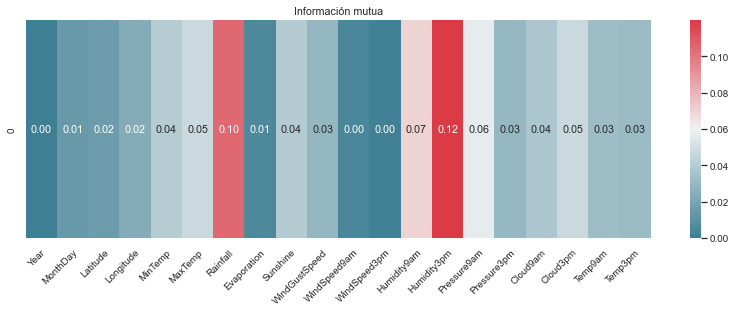

In [156]:
# Información mutua, despues de imputar.
MI = mutual_info_regression(X_train_imp_num, y_train)
fig, ax = plt.subplots(1,1, figsize=(14,4))
ax.set_title('Información mutua')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(df_train_num_cat.columns.values[:-1],rotation=45, ha='right', rotation_mode='anchor')

Empty DataFrame
Columns: [Year, MonthDay, Latitude, Longitude, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainTomorrow]
Index: []

[0 rows x 21 columns]


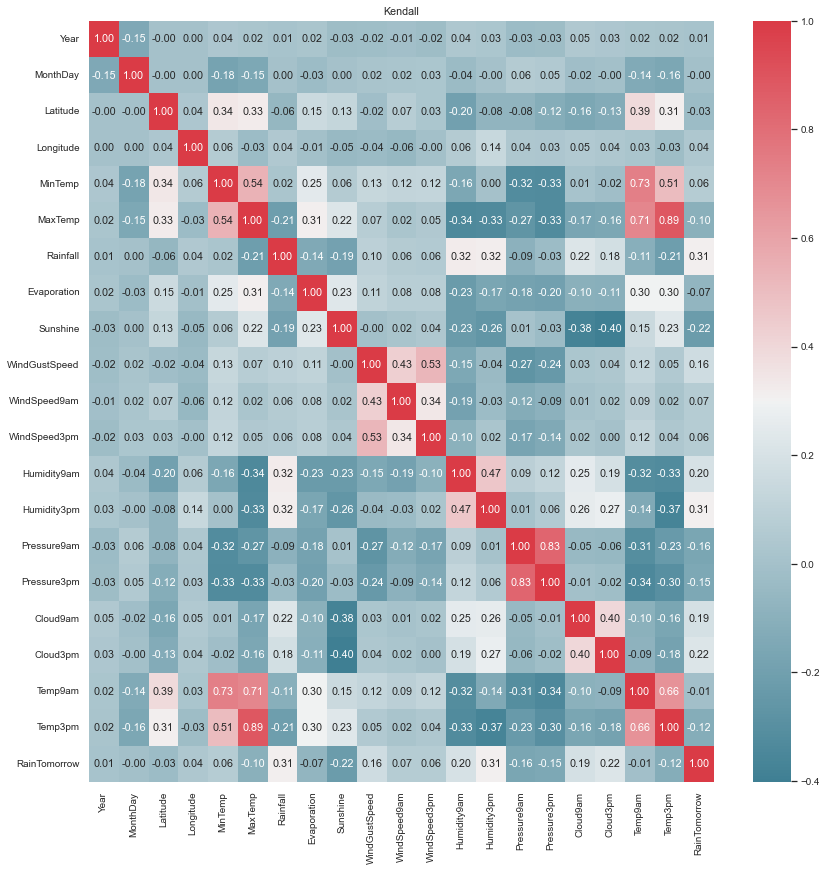

In [157]:
## numerica a categorica
print(pd.DataFrame(df_train_num_cat.head(0)))
fig, axes = plt.subplots(1,1,figsize=(14,14))

tau = df_train_num_cat.corr(method='kendall')
axes.set_title("Kendall")
sns.heatmap(tau, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f",ax=axes)
sns.set(font_scale=0.9)

Empty DataFrame
Columns: [RainToday_enc, Location_enc, WindDir_polar1, WindDir_polar2, WindDir9am_enc, WindDir3pm_enc]
Index: []


<AxesSubplot:>

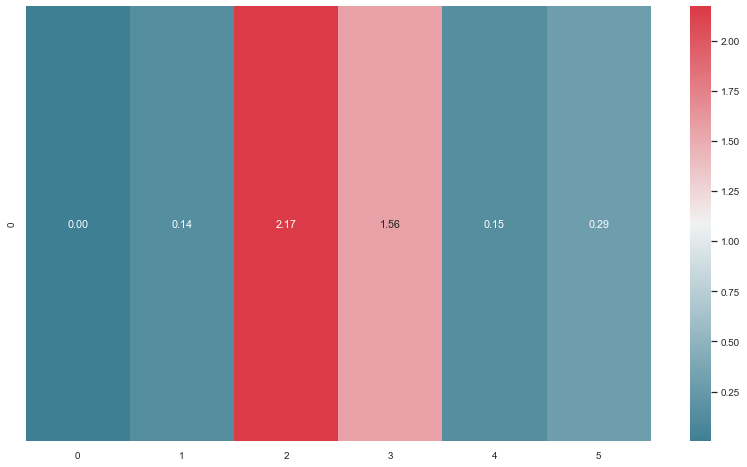

In [158]:
## Información mutua corr cat-cat input-input WindGustDir_enc

print(pd.DataFrame(X_train_imp_cat.head(0)))
MI = mutual_info_regression(X_train_imp_cat,X_train_imp_cat["WindDir_polar1"])
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.heatmap([MI],cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")


Empty DataFrame
Columns: [RainToday_enc, Location_enc, WindDir_polar1, WindDir_polar2, WindDir9am_enc, WindDir3pm_enc]
Index: []


C:\Users\54922\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

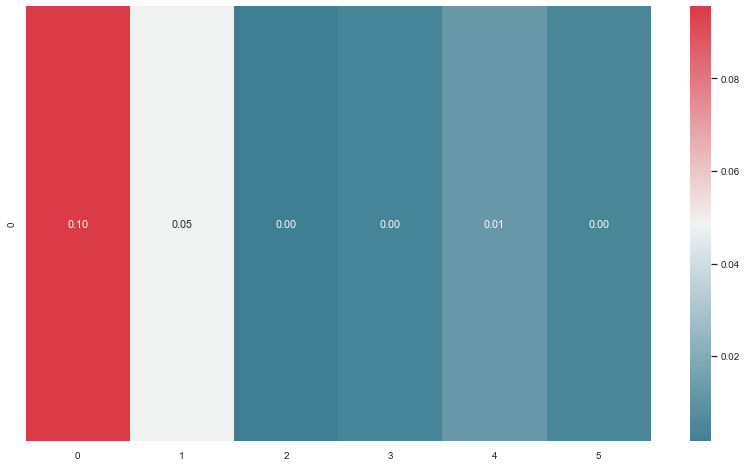

In [159]:
## Informaci[on mutua corr cat-cat input-output
print(pd.DataFrame(X_train_imp_cat.head(0)))
MI = mutual_info_regression(X_train_imp_cat, y_train)
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.heatmap([MI],cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")



In [160]:
###ACA DEBE IR ELIMINACIÓN DE OUTLIERS
# Visualizamos los datos de cada columna
def display_boxplot(dataset):
    fig = dataset.boxplot(figsize=(22,10))
    plt.show()

In [174]:
X_train_f=datasetIMP4.drop(columns={"Location_enc","WindDir9am_enc","WindDir3pm_enc","index","Temp9am","Temp3pm","MinTemp",
"Evaporation","Sunshine","WindSpeed9am","WindSpeed3pm","Cloud9am","Cloud3pm","Pressure3pm","Humidity3pm","RainToday_enc"})

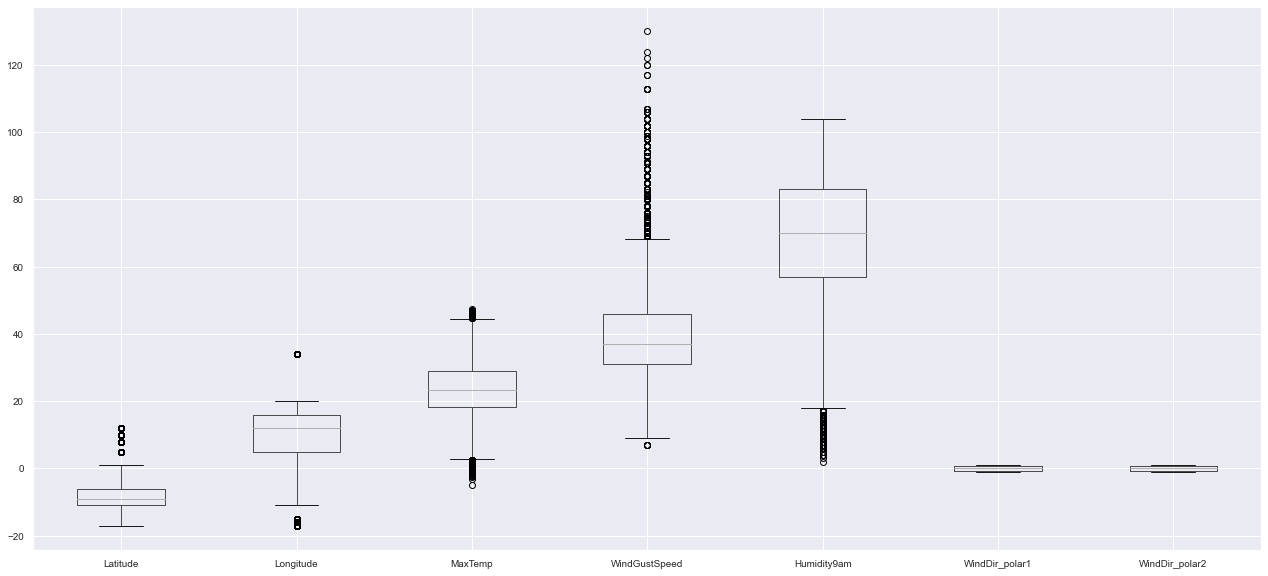

In [175]:
display_boxplot(pd.DataFrame(X_train_f).drop(columns={"Pressure9am","Year","Rainfall","MonthDay"}))
#display_boxplot(pd.DataFrame(dataset__,columns =["Pressure9am","Pressure3pm"]))
#display_boxplot(pd.DataFrame(dataset__.drop(columns = ["Pressure9am","Pressure3pm","Rainfall","Year","MonthDay","Date_int"])))

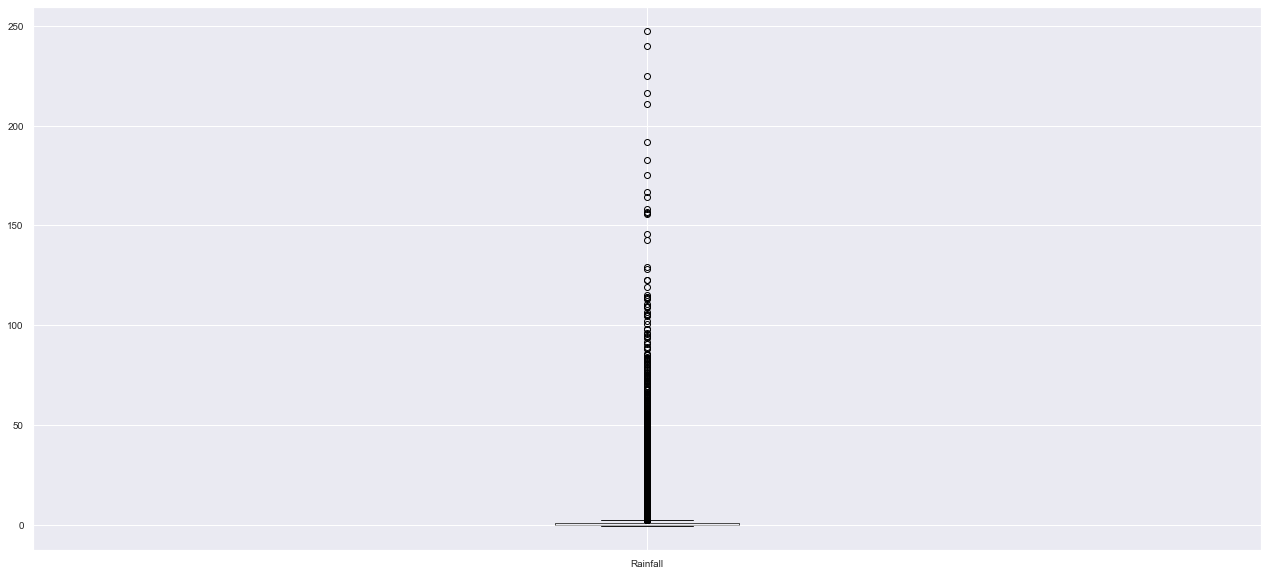

In [176]:
display_boxplot(pd.DataFrame(X_train_f["Rainfall"]))

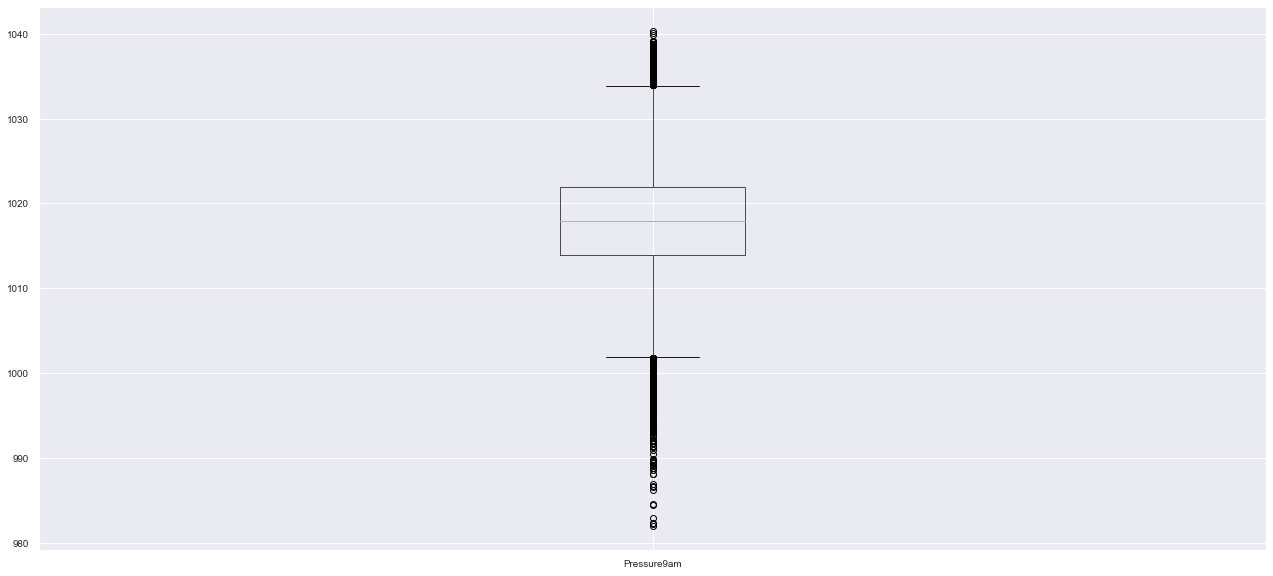

In [177]:
display_boxplot(pd.DataFrame(X_train_f["Pressure9am"]))

In [178]:
X_train_f.head(0)

,Year,MonthDay,Latitude,Longitude,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Pressure9am,WindDir_polar1,WindDir_polar2


outliers corregidos en la columna MaxTemp = 0.2586268828276539%
outliers corregidos en la columna Rainfall = 0.457386431667425%
outliers corregidos en la columna WindGustSpeed = 3.5776718791158792%
outliers corregidos en la columna Humidity9am = 0.9506932637275797%
outliers corregidos en la columna Pressure9am = 2.2126966641921504%


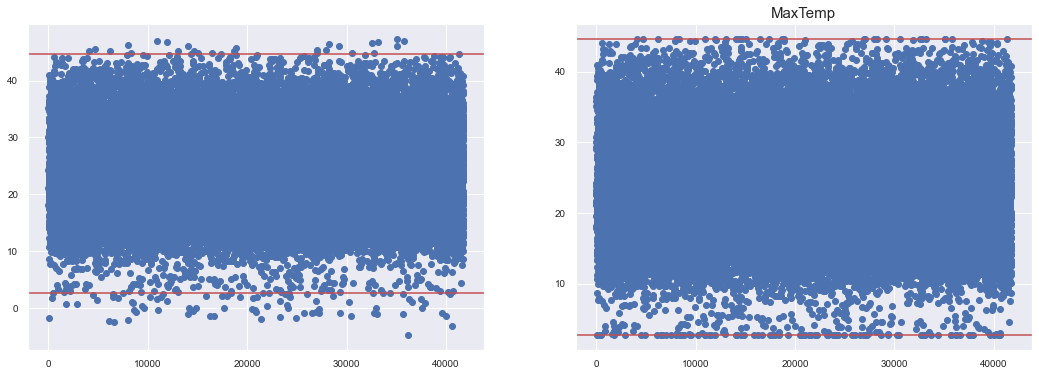

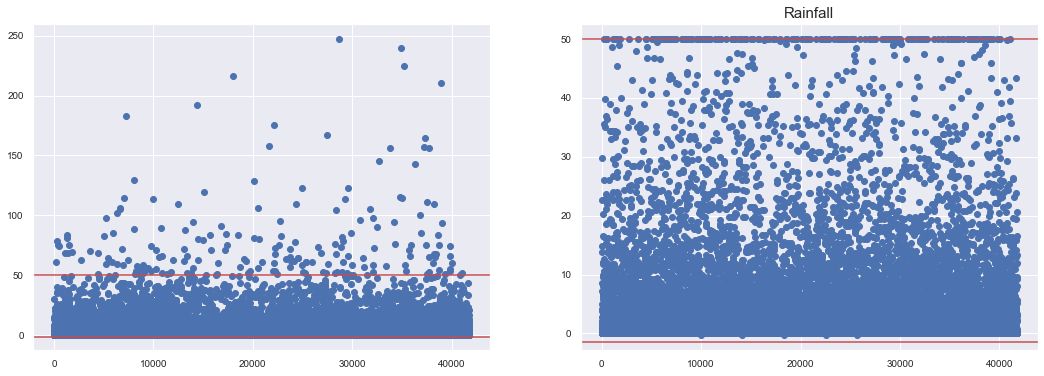

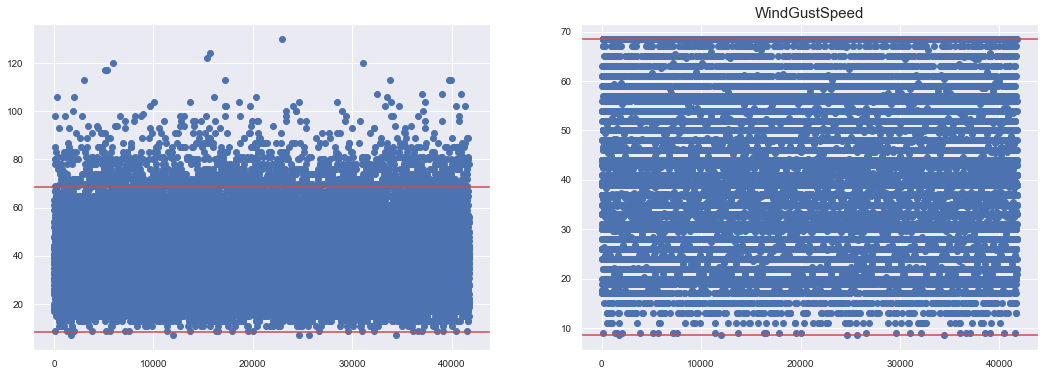

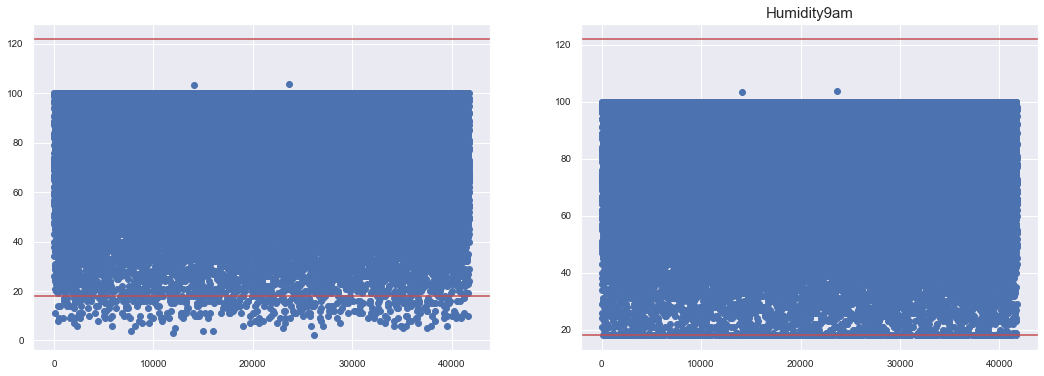

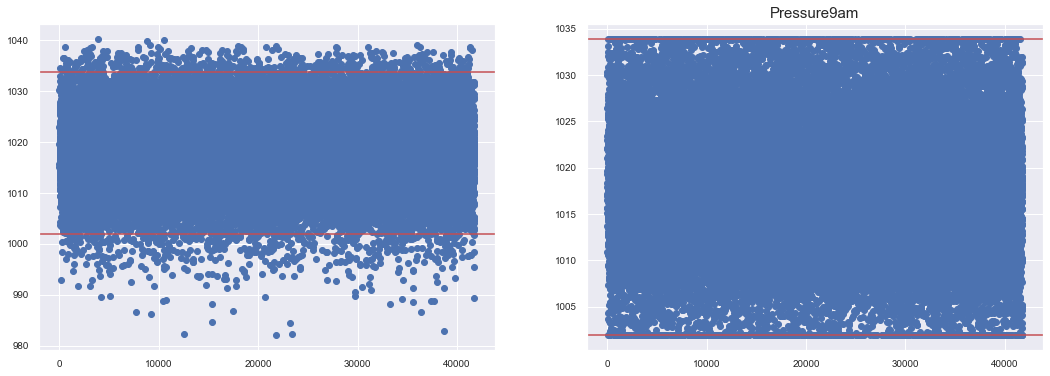

In [188]:
#Tiene que ser por columna
datasetIMP4_out=X_train_f.copy()
for column in X_train_f:
    if column not in ["Rainfall","Latitude","Longitude","Year","Month","MonthDay","Location_enc","WindDir_polar1","WindDir_polar2"]:
        q25, q75 = np.percentile(X_train_f[column], 25), np.percentile(X_train_f[column], 75)
        iqr = q75 - q25
        cutoff = iqr * 1.5
        lower,upper = q25-cutoff, q75+cutoff 
        percentage = 100*(len(X_train_f[column][X_train_f[column] < lower]) + len(X_train_f[column][X_train_f[column] > upper]))/len(X_train_f[column])

        datasetIMP4_out[column].replace()
        prueba1=np.where(X_train_f[column] < lower,lower,X_train_f[column])
        datasetIMP4_out[column]=np.where(prueba1 > upper,upper,prueba1)

        print("outliers corregidos en la columna {} = {}%".format(column,percentage))
        fig,axes = plt.subplots(1,2,figsize=(18,6))
        axes[0].scatter(range(0,len(X_train_f[column])),X_train_f[column])
        axes[0].axhline(lower,color="r");axes[0].axhline(upper,color="r")
        plt.title(column,fontsize=15)
       

        axes[1].scatter(range(0,len(datasetIMP4_out[column])),datasetIMP4_out[column])
        axes[1].axhline(lower,color="r");axes[1].axhline(upper,color="r")
        plt.title(column,fontsize=15)
    elif column == "Rainfall":
        q25, q75 = np.percentile(X_train_f[column], 25), np.percentile(X_train_f[column], 75)
        iqr = q75 - q25
        cutoff = iqr * 1.5
        lower,upper = q25-cutoff, 50
        percentage = 100*(len(X_train_f[column][X_train_f[column] < lower]) + len(X_train_f[column][X_train_f[column] > upper]))/len(X_train_f[column])

        datasetIMP4_out[column].replace()
        prueba1=np.where(X_train_f[column] < lower,lower,X_train_f[column])
        datasetIMP4_out[column]=np.where(prueba1 > upper,upper,prueba1)

        print("outliers corregidos en la columna {} = {}%".format(column,percentage))
        fig,axes = plt.subplots(1,2,figsize=(18,6))
        axes[0].scatter(range(0,len(X_train_f[column])),X_train_f[column])
        axes[0].axhline(lower,color="r");axes[0].axhline(upper,color="r")
        plt.title(column,fontsize=15)
       

        axes[1].scatter(range(0,len(datasetIMP4_out[column])),datasetIMP4_out[column])
        axes[1].axhline(lower,color="r");axes[1].axhline(upper,color="r")
        plt.title(column,fontsize=15)

       




In [189]:
X_train_imp_NORM=TP.normal_minmax(datasetIMP4_out)

In [190]:
X_train_imp_NORM

,Year_scal,MonthDay_scal,Latitude_scal,Longitude_scal,MaxTemp_scal,Rainfall_scal,WindGustSpeed_scal,Humidity9am_scal,Pressure9am_scal,WindDir_polar1_scal,WindDir_polar2_scal
0,1.000000,0.099476,0.413793,0.725490,0.653571,0.006822,0.475000,0.652629,0.431250,0.691342,0.961940
1,0.000000,0.861257,0.379310,0.000000,0.513095,0.046549,0.475000,0.652629,0.412500,0.038060,0.691342
2,1.000000,0.005236,0.137931,0.490196,0.367857,0.010795,0.541667,0.547742,0.659375,0.038060,0.308658
3,0.000000,0.803665,0.172414,0.549020,0.441667,0.006822,0.591667,0.337968,0.887500,0.146447,0.146447
4,0.333333,0.801047,0.379310,0.392157,0.775000,0.006822,0.658333,0.093233,0.556250,0.853553,0.146447
...,...,...,...,...,...,...,...,...,...,...,...
41754,0.666667,0.523560,0.275862,0.019608,0.239286,0.416011,0.541667,0.629321,0.068750,0.038060,0.691342
41755,1.000000,0.481675,0.862069,0.568627,0.586905,0.110112,0.541667,0.722553,0.471875,0.038060,0.308658
41756,0.666667,0.358639,0.206897,0.588235,0.348810,0.272994,0.758333,0.780824,0.103125,0.146447,0.853553
41757,0.333333,0.460733,0.241379,0.607843,0.286905,0.165730,0.541667,0.920673,0.256250,0.961940,0.308658


(11, 11)


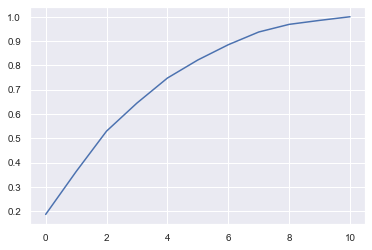

In [191]:
pca_ = PCA()
pca_.fit(X_train_imp_NORM)
print(pca_.components_.shape)
plt.plot(np.cumsum(pca_.explained_variance_ratio_)); plt.grid(True);